## Ability score draft

[StackExchange question.](https://rpg.stackexchange.com/questions/120334/how-can-i-model-this-party-draft-pool-ability-score-generation-method-in-anydi)

In this system, each player rolls the standard 4d6 drop lowest six times, but the scores are put into a common pool.
The players then draft scores from the pool, reversing order every round, e.g. player 1, 2, 3, 4, 4, 3, 2, 1, 1, 2, 3, 4, ...

This graphs the distribution of the highest, 2nd highest, ... score for the first and last players out of 4.
Note that the curves aren't independent; in particular, the first and last players are likely to have pairs of the same number when they take two picks in a row.

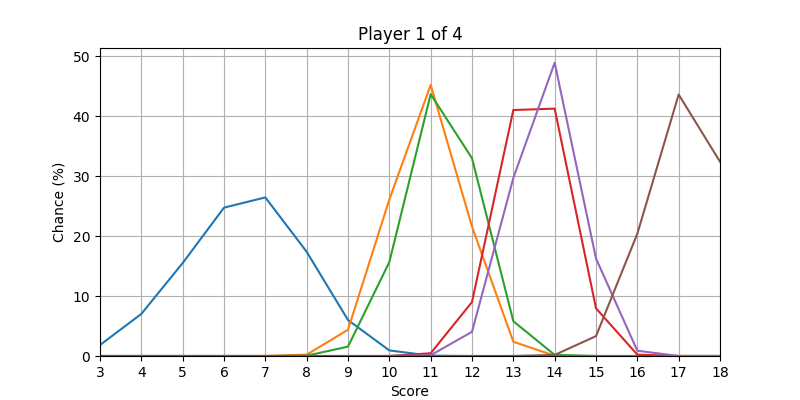

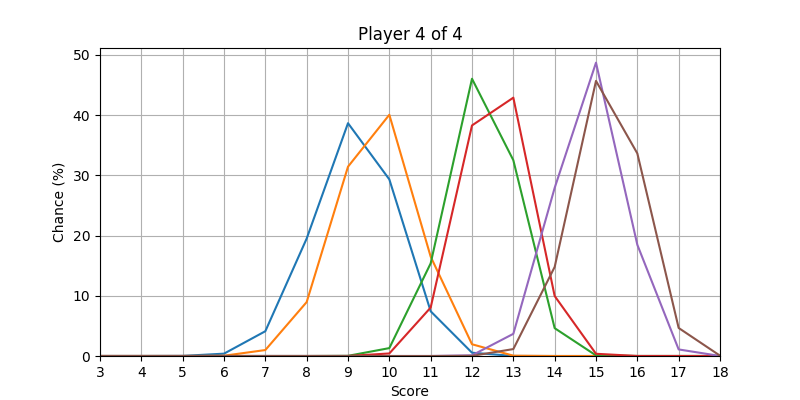

In [1]:
%pip install icepool

import icepool
import matplotlib.pyplot as plt

def snake_draft_graph(num_players,
                      player,
                      ability_score=icepool.d6.highest(4, 3),
                      reverses=(False, True, False, True, False, True)):
    """
    Args:
        num_players: The number of players. Six times this many scores will be rolled.
        player: The player to graph.
        ability_score: A die representing the distribution of a single score.
        reverses: A 6-tuple representing whether the player order should be flipped
            for that round of drafting. In other words, each element determines
            whether a column of the result table will be flipped.
            The default performs a snake draft.
    """
    total_rolls = 6 * num_players
    fig, ax = plt.subplots(figsize=(8, 4))
    for score_rank, reverse in enumerate(reverses):
        if reverse:
            index = (score_rank + 1) * num_players - 1 - player
        else:
            index = score_rank * num_players + player
        rank_die = ability_score.pool(total_rolls)[index]
        ax.plot(rank_die.outcomes(), rank_die.probabilities(percent=True))
    ax.grid(True)
    ax.set_xlim(3, 18)
    ax.set_xticks(range(3, 19))
    ax.set_ylim(0)
    ax.set_title(f'Player {player+1} of {num_players}')
    ax.set_xlabel('Score')
    ax.set_ylabel('Chance (%)')
    plt.show()

snake_draft_graph(4, 0)
snake_draft_graph(4, 3)
    

This computes the mean array for each player, i.e. the mean value for each ranked ability score for each player.

In [2]:
%pip install icepool

import icepool

def snake_draft_table(num_players,
                      ability_score=icepool.d6.highest(4, 3),
                      reverses=(False, True, False, True, False, True)):
    """
    Args:
        num_players: The number of players. Six times this many scores will be rolled.
        ability_score: A die representing the distribution of a single score.
        reverses: A 6-tuple representing whether the player order should be flipped
            for that round of drafting. In other words, each element determines
            whether a column of the result table will be flipped.
            The default performs a snake draft.
    """
    total_rolls = 6 * num_players
    scores = [ability_score.pool(total_rolls)[i] for i in range(total_rolls - 1, -1, -1)]
    text  = '| Player |    1st|    2nd|    3rd|    4th|    5th|    6th|\n'
    text += '|-------:|------:|------:|------:|------:|------:|------:|\n'
    for player in range(num_players):
        text += f'|      {player+1} '
        for score_rank, reverse in enumerate(reverses):
            if reverse:
                index = (score_rank + 1) * num_players - 1 - player
            else:
                index = score_rank * num_players + player
            text += f'| {scores[index].mean():5.2f} '
        text += '|\n'
    text += '\n'
    print(text)

for num_players in [1, 2, 3, 4, 5, 6]:
    snake_draft_table(num_players)

| Player |    1st|    2nd|    3rd|    4th|    5th|    6th|
|-------:|------:|------:|------:|------:|------:|------:|
|      1 | 15.66 | 14.17 | 12.96 | 11.76 | 10.41 |  8.50 |


| Player |    1st|    2nd|    3rd|    4th|    5th|    6th|
|-------:|------:|------:|------:|------:|------:|------:|
|      1 | 16.45 | 13.93 | 13.30 | 11.44 | 10.74 |  7.41 |
|      2 | 15.40 | 14.61 | 12.69 | 12.08 |  9.94 |  8.94 |


| Player |    1st|    2nd|    3rd|    4th|    5th|    6th|
|-------:|------:|------:|------:|------:|------:|------:|
|      1 | 16.82 | 13.84 | 13.42 | 11.32 | 10.85 |  6.85 |
|      2 | 15.95 | 14.29 | 13.01 | 11.76 | 10.34 |  8.22 |
|      3 | 15.31 | 14.77 | 12.60 | 12.18 |  9.77 |  9.09 |


| Player |    1st|    2nd|    3rd|    4th|    5th|    6th|
|-------:|------:|------:|------:|------:|------:|------:|
|      1 | 17.05 | 13.80 | 13.48 | 11.26 | 10.91 |  6.48 |
|      2 | 16.29 | 14.13 | 13.17 | 11.60 | 10.53 |  7.75 |
|      3 | 15.73 | 14.48 | 12.86 | 11.92 | 10.13 |